## 분류 : K-폴드 교차 검증
### #01. 개요
1. 머신러닝을 구현하는 과정에서의 대표적 문제점
##### 1. 과대적합(Overfitting) : 학습 데이터를 과하게 학습하는 것
##### 2. 과소적합(Underfitting) : 학습 데이터를 충분히 학습하지 못하는 것
##### 3. Sample loss 문제 : 학습 데이터가 적은 경우 발생하는 문제
데이터를 Train용과 Test용으로 나누는 과정에서 Train 데이터가 부족해지기 때문에 발생하는 문제
위와 같은 상황에서 학습이 발생시키는 에러를 과소추정하지 않으면서 데이터의 손실을 최소화하는 방법으로 K-폴드
교차 검증이 있다.
2. K-폴드 교차 검증 예시
###### K 가 5인 경우에 대한 예시
![res/kfold.png](res/kfold.png)

###### Fold가 5로 이루어져 있다.
###### 하나의 데이터 셋을 5등분하여 각 Fold마다 한 번씩 Test 데이터가 되도록 train_split을 개별 수행한다.
###### 그 결과 총 5번의 학습이 가능해지며 그 학습 결과에 대한 평균치(혹은 최대치)를 구한다.



#### #02. 패키지 참조

In [1]:
import warnings
warnings.filterwarnings('ignore')
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# 교차검증 패키지
from sklearn.model_selection import cross_val_score

### #03. 데이터 처리


1. 데이터 셋 준비

In [3]:
origin = read_excel("https://data.hossam.kr/G02/iris.xlsx")
origin.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2. 라벨링

In [4]:
labels = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
classes = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [5]:
df = origin.copy()
df['Species'] = df['Species'].map(labels)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


독립변수, 종속변수 분리

In [6]:
x = df.drop('Species', axis=1)
y = df['Species']
x.shape, y.shape

((150, 4), (150,))

### #04. K-Fold 교차 검증을 수행하는 모델링

k-fold만 적용한 경우

In [7]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
# 기존 코드
# knn.fit(x, y) # 학습
# y_pred = knn.predict(x) # 예측값
# score = accuracy_score(y, y_pred)
# 교차검증
score = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
# 교차검증 결과 -> 10개의 Fold를 나누어서 10번 학습/평가를 수행
print(score)
# 10개의 정확도 평균
print(score.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


최적의 k값 찾기

In [9]:
k_range = range(1, 101)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_scores.append(score.mean())
#k_scores

가장 높은 정확도를 갖는 k값 찾기

일반 코딩(최대값 찾기 알고리즘)

In [10]:
max_acc = k_scores[0]
max_index = 0
for i in range(1, len(k_scores)):
    if max_acc < k_scores[i]:
        max_acc = k_scores[i]
        max_index = i
print("최대 정확도: {0}, 최대 정확도를 갖는 k: {1}".format(max_acc, max_index+1))


최대 정확도: 0.9800000000000001, 최대 정확도를 갖는 k: 13


파이썬 내장함수 활용

In [11]:
max_acc = max(k_scores)
max_index = k_scores.index(max_acc)
print("최대 정확도: {0}, 최대 정확도를 갖는 k: {1}".format(max_acc, max_index+1))

최대 정확도: 0.9800000000000001, 최대 정확도를 갖는 k: 13


학습 과정 시각화

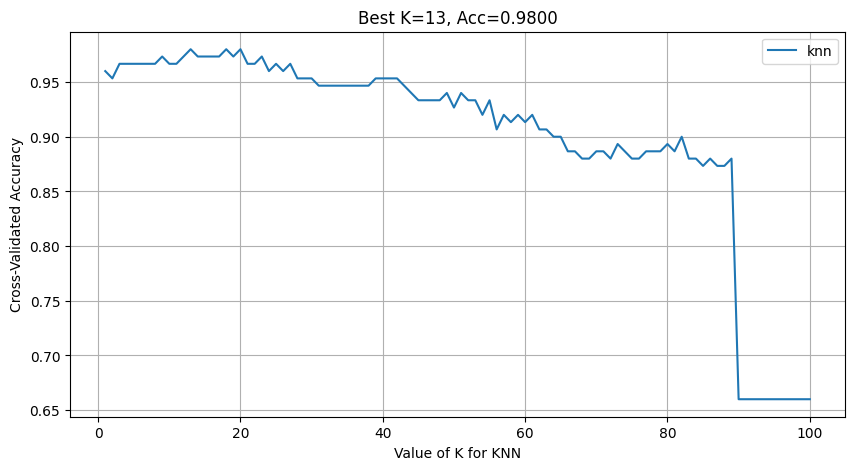

In [12]:
plt.figure(figsize=(10, 5))
sb.lineplot(x=k_range, y=k_scores, label='knn')
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Best K={0}, Acc={1:.4f}".format(max_index+1, max_acc))
plt.grid()
plt.show()
plt.close()